In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"subhashini06","key":"4ddab4dbf0ce8af381ee531f6196956c"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                    title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                 Netflix Movies and TV Shows                    1MB  2024-04-10 09:48:38          25179        537  1.0              
mayankanand2701/zomato-stock-price-dataset             Zomato Stock Price Dataset 📊🍗🏨🍴               13KB  2024-05-23 06:42:34            990         25  1.0              
zeesolver/spotfy                                       Spotify Songs Album                           47KB  2024-05-10 09:21:57           1779         26  1.0              
prasad22/weather-data                                  Weather Data                                  43MB  2024-05-18 14:27:35           165

In [ ]:
! kaggle datasets download 'ahemateja19bec1025/traffic-sign-dataset-classification'

Dataset URL: https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification
License(s): CC0-1.0
 95% 181M/190M [00:01<00:00, 158MB/s]
100% 190M/190M [00:01<00:00, 172MB/s]


In [9]:
! kaggle datasets download 'meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 96% 585M/612M [00:09<00:00, 128MB/s]
100% 612M/612M [00:09<00:00, 64.5MB/s]


In [10]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [1]:
!pip install tensorflow
!pip install tensorflow keras
!pip install tensorflow sklearn
!pip install tensorflow matplotlib
!pip install tensorflow pandas
!pip install tensorflow pil

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split #to split training and testing data
from keras.utils import to_categorical#to convert the labels present in y_train and t_test into one-hot encoding
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout#to create CNN
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [53]:
cur_path='/content/data'

In [54]:
cur_path


'/content/data'

In [99]:
for i in range(classes):
   path = os.path.join(cur_path,'train',str(i))
   images = os.listdir(path)


In [100]:
path

'/content/data/train/42'

In [56]:
for a in images:
  try:
    image = Image.open(path + '/'+ a)
    image = image.resize((30,30))
    image = np.array(image)
    #sim = Image.fromarray(image)
    data.append(image)
    labels.append(i)
  except:
    print("Error loading image")

In [57]:
data = np.array(data)
labels = np.array(labels)

In [58]:
print(data.shape, labels.shape)

(240, 30, 30, 3) (240,)


In [59]:
from sklearn.model_selection import train_test_split

# Split the data and labels into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (192, 30, 30, 3)
y_train shape: (192,)
X_test shape: (48, 30, 30, 3)
y_test shape: (48,)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(192, 30, 30, 3) (48, 30, 30, 3) (192,) (48,)


In [73]:
#Convert labels to onehot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [74]:
#y_train = y_train.reshape(-1, 43)
#y_test = y_test.reshape(-1, 43)

In [119]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [83]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
eps = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_test, y_test))


Epoch 1/15
6/6 [==============================] - 1s 191ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
6/6 [==============================] - 1s 116ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
6/6 [==============================] - 1s 124ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
6/6 [==============================] - 1s 126ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
6/6 [==============================] - 1s 121ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
6/6 [==============================] - 1s 117ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
6/6 [==============================] - 1s 119ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss

In [86]:
print(history.history)

{'loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


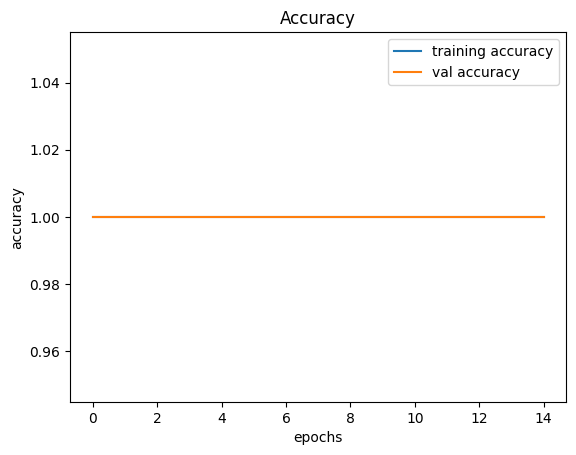

In [84]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

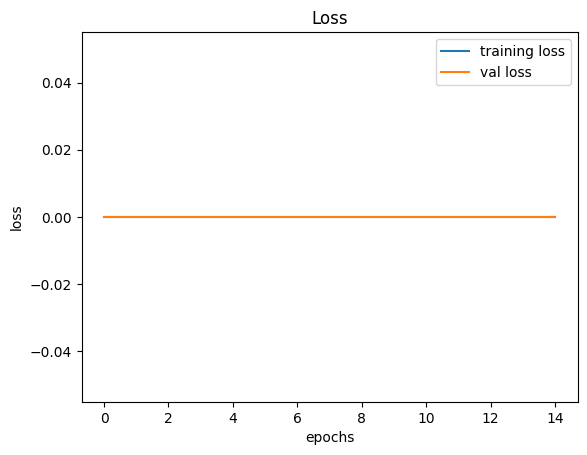

In [85]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [106]:
import numpy as np
import pandas as pd
from PIL import Image
import os

def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data = []
    for img in imgs:
        try:
            image_path = os.path.join('/content/data/', img)  # Corrected file path
            image = Image.open(image_path)
            image = image.resize((30, 30))
            data.append(np.array(image))
        except Exception as e:
            print(f"Error loading image {img}: {e}")
    X_test = np.array(data)
    return X_test, label

# Example usage
test_csv_path = '/content/data/Test.csv'  # Corrected file path
X_test, label = testing(test_csv_path)


In [124]:
X_test

array([[[[116, 140, 175],
         [116, 138, 171],
         [119, 138, 173],
         ...,
         [102, 119, 150],
         [101, 122, 149],
         [ 93, 112, 139]],

        [[116, 142, 177],
         [116, 141, 175],
         [117, 141, 174],
         ...,
         [120, 143, 178],
         [122, 144, 176],
         [122, 142, 174]],

        [[118, 142, 174],
         [116, 141, 175],
         [114, 140, 172],
         ...,
         [121, 144, 181],
         [122, 144, 180],
         [119, 142, 178]],

        ...,

        [[117, 137, 168],
         [115, 135, 165],
         [116, 135, 164],
         ...,
         [116, 138, 170],
         [116, 136, 168],
         [118, 139, 171]],

        [[116, 136, 166],
         [115, 134, 167],
         [115, 133, 165],
         ...,
         [114, 135, 168],
         [116, 136, 166],
         [115, 139, 167]],

        [[112, 135, 166],
         [111, 134, 165],
         [119, 135, 166],
         ...,
         [115, 137, 166],
        

In [123]:
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_pred


395/395 [==============================] - 14s 35ms/step


array([41, 35, 29, ..., 29, 41,  0])

In [122]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.016785431512272367


In [114]:
model.save("/content/training/TSR.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [116]:
import os
os.chdir(r'/content/data')
from keras.models import load_model
model = load_model('/content/training/TSR.h5')

In [117]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

1/1 [==============================] - 0s 24ms/step
Predicted traffic sign is:  Right-of-way at intersection


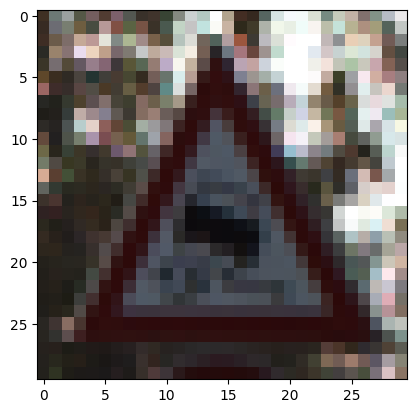

In [127]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=1)
    return image,Y_pred
plot,prediction = test_on_img(r'/content/data/Test/00504.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()